# Import all Required Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r'split/train',target_size=(750,750),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 3002 images belonging to 8 classes.


In [5]:
x_test = test_datagen.flow_from_directory(r'split/test',target_size=(750,750),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 1001 images belonging to 8 classes.


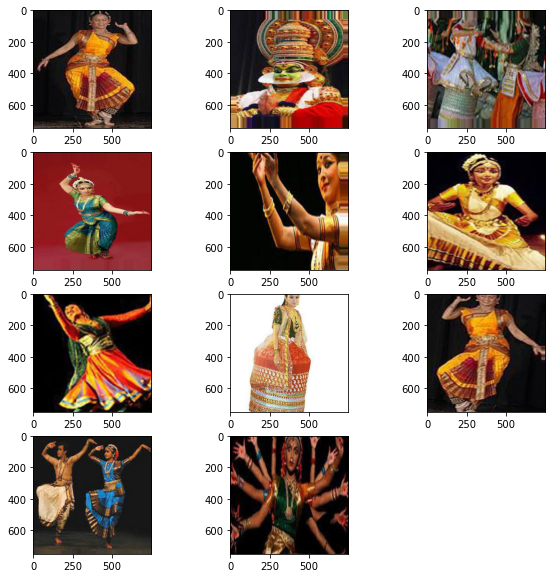

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][31]) 

In [7]:
x_train[0][0].shape    

(32, 750, 750, 3)

In [8]:
type(x_train[0][0])

numpy.ndarray

In [9]:
type(x_test[0][0])

numpy.ndarray

# CNN Model Building

In [10]:
cnn = Sequential()

# Convolutional Layer + Pooling Layer

In [11]:
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2),input_shape = (750,750,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

# Convolutional Layer + Pooling Layer

In [12]:
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

# Flattern Layer

In [13]:
cnn.add(Flatten())

# Connection Layer

In [14]:
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units= 500))
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))

# Output Layer

In [15]:
cnn.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=8))

# Compile

In [16]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Summary

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 374, 374, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 187, 187, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 67712)             0         
                                                                 
 dense (Dense)               (None, 500)               3

# Training the Model

In [18]:
cnn.fit_generator(x_train,steps_per_epoch=30,epochs=30,validation_data=x_test,validation_steps=30)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19748\2629802031.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(x_train,steps_per_epoch=30,epochs=30,validation_data=x_test,validation_steps=30)


Epoch 1/30
30/30 [==============================] - 222s 7s/step - loss: 2.0572 - accuracy: 0.2411 - val_loss: 1.9171 - val_accuracy: 0.3063
Epoch 2/30
30/30 [==============================] - 188s 6s/step - loss: 1.7972 - accuracy: 0.3428 - val_loss: 1.6168 - val_accuracy: 0.4323
Epoch 3/30
30/30 [==============================] - 175s 6s/step - loss: 1.4554 - accuracy: 0.4740 - val_loss: 1.4244 - val_accuracy: 0.5146
Epoch 4/30
30/30 [==============================] - 169s 6s/step - loss: 1.3294 - accuracy: 0.5304 - val_loss: 1.2022 - val_accuracy: 0.5542
Epoch 5/30
30/30 [==============================] - 170s 6s/step - loss: 1.0809 - accuracy: 0.6101 - val_loss: 1.1203 - val_accuracy: 0.6302
Epoch 6/30
30/30 [==============================] - 181s 6s/step - loss: 0.9221 - accuracy: 0.7000 - val_loss: 0.8728 - val_accuracy: 0.7063
Epoch 7/30
30/30 [==============================] - 187s 6s/step - loss: 0.8506 - accuracy: 0.7138 - val_loss: 0.7698 - val_accuracy: 0.7406
Epoch 8/30
30

# Saving a Model

In [19]:
cnn.save("df.h5")

In [20]:
from keras.models import load_model
import cv2
import numpy as np

In [21]:
cnnmodel = load_model("df.h5")

In [22]:
def detect(frame):
    img=cv2.resize(frame,(750,750))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if(np.max(img)>1):
        img = img/255.0
    img = np.array([img])
    prediction = cnnmodel.predict(img)
    label = ['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam','odissi', 'sattriya']
    prediction = np.argmax(prediction)
    print("Prediction:", prediction)
    return plt.imshow(img[0]),print(label[prediction])

In [26]:
image = cv2.imread("Kathakalidancer.jpg")

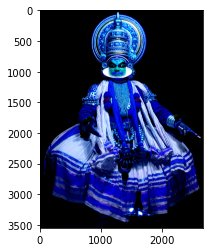

In [27]:
import matplotlib.pyplot as plt
plt.imshow(image)

1/1 [==============================] - 0s 43ms/step
Prediction: 2
kathakali


(<matplotlib.image.AxesImage at 0x168441ec160>, None)

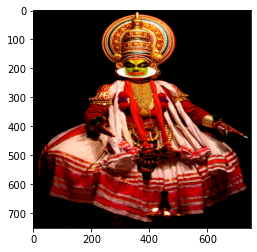

In [28]:
detect(image)

___

In [29]:
image1 = cv2.imread("kuchipudi.jpg")

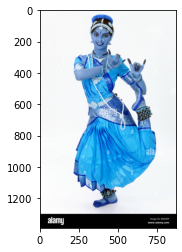

In [30]:
import matplotlib.pyplot as plt
plt.imshow(image1)

1/1 [==============================] - 0s 42ms/step
Prediction: 3
kuchipudi


(<matplotlib.image.AxesImage at 0x16850698760>, None)

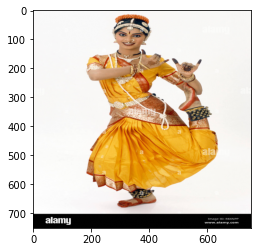

In [31]:
detect(image1)

___

In [39]:
image2 = cv2.imread("mohiniyattam.jpg")

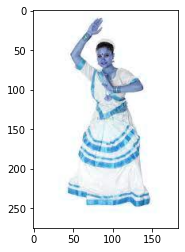

In [40]:
import matplotlib.pyplot as plt
plt.imshow(image2)

1/1 [==============================] - 0s 37ms/step
Prediction: 5
mohiniyattam


(<matplotlib.image.AxesImage at 0x16844ffd5b0>, None)

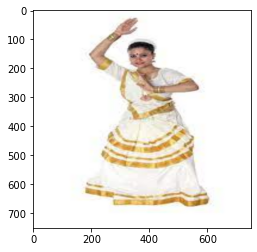

In [41]:
detect(image2)

___

In [42]:
image3 = cv2.imread("Manipuri.jpg")

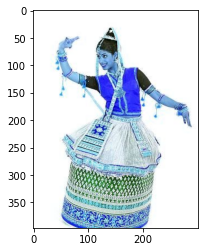

In [43]:
import matplotlib.pyplot as plt
plt.imshow(image3)

1/1 [==============================] - 0s 41ms/step
Prediction: 4
manipuri


(<matplotlib.image.AxesImage at 0x168450d52b0>, None)

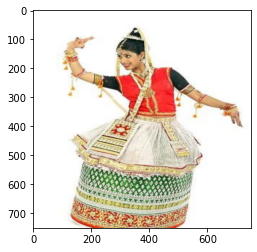

In [44]:
detect(image3)